<a href="https://colab.research.google.com/github/technologyhamed/Neuralnetwork/blob/Single/SingleLayer/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
#!pip install datapackage

In [161]:
# Perceptron Algorithm on the Sonar Dataset
from sklearn.model_selection import KFold 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange
from pandas import read_csv
from csv import reader
from random import seed
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix

In [162]:
#activation function
def Cross_Entropy(y_hat, y):
    # There are 2 possibilities for the ground-truth: either 0 or 1
    # Note that np.log() is actually the natural logarithm with e, for its base
    if y == 1:
      return -np.log(y_hat)
    else:
      return -np.log(1 - y_hat)
# This is just the classic sigmoid function, given input z
def sigmoid (x):
  value=np.float128(np.float128(x))
  return 1/(1 +np.exp(-value))

In [163]:
def derivative_Cross_Entropy(y_hat, y):
    # Again we account for 2 possibilities of y=0/1
    if y == 1:
      return -1/y_hat
    else:
      return 1 / (1 - y_hat)
# The derivative of sigmoid is quite straight-forward
def derivative_sigmoid(x):
    return x*(1-x)

In [164]:
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

In [165]:
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

In [166]:
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

In [167]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [168]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
		standardValue	=	standardactivation(activation)
	return 1.0 if standardValue >= 0.5 else 0.0

In [169]:
def standardactivation(activation):
  activation=np.round(activation,2)
  return sigmoid(activation)

In [170]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

In [171]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
			weights = [0.5 for i in range(len(train[0]))]
			ErrorRate=list()
			for epoch in range(n_epoch):
				total_error	=	0
				for row in train:
					prediction = predict(row, weights)
					error = row[-1] - prediction
					dEdW_1	=	derivative_sigmoid(prediction) 
					weights[0] = weights[0] + l_rate * error	
					for i in range(len(row)-1):
						weights[i + 1] = weights[i + 1] + (l_rate * error * row[i])  -	dEdW_1 
					total_error += error	
				ErrorRate.append(total_error)
			return weights,ErrorRate
	 

In [172]:
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
		predictions = list()
		weights,ErrorRate = train_weights(train, l_rate, n_epoch)
		for row in test:
			prediction = predict(row, weights)
			predictions.append(prediction)
		return(predictions,ErrorRate)

In [173]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
		folds = cross_validation_split(dataset, n_folds)
		scores = list()
		errorList=list()
		Confusion_matrix=[]
		for fold in folds:
			train_set = list(folds)
			train_set.remove(fold)
			train_set = sum(train_set, [])
			test_set = list()
			for row in fold:
				row_copy = list(row)
				test_set.append(row_copy)
				row_copy[-1] = None
			predicted,ErrorRate = algorithm(train_set, test_set, *args)
			actual = [row[-1] for row in fold]
			accuracy = accuracy_metric(actual, predicted)
			predicted=np.asarray(predicted)
			actual=np.asarray(actual)
			Confusion_matrix.append(confusion_matrix(predicted,actual))
			scores.append(accuracy)
			errorList.append(ErrorRate)
		return scores,errorList,Confusion_matrix

In [174]:
# Test the Perceptron algorithm on the sonar dataset
seed(10)
# load and prepare data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
filename = '../content/sample_data/sonar.all-data.csv'
data = read_csv(url,header=None)
data.to_csv (filename, header=None)
dataset=load_csv(filename)

In [175]:
# convert string class to integers
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
str_column_to_int(dataset, len(dataset[0])-1)

{'M': 0, 'R': 1}

In [176]:
# evaluate algorithm
n_folds = 5
l_rate = 0.1
n_epoch = 100
    


In [177]:
def plots(ErrorRate,Confusion_matrix):
  if not ErrorRate :
    return 'null'
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
  plt.grid()
  ErrorRate=np.asarray(ErrorRate)
  ax[0].plot(np.abs(ErrorRate[-1]),c='r',label='GrediantError')
  ax[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
  ax[1] = sns.heatmap(Confusion_matrix[-1], annot=True, cmap='OrRd')
  ax[1].set_title('\n\n');
  ax[1].set_xlabel('\nPredicted Values')
  ax[1].set_ylabel('Actual Values ');
  ## Ticket labels - List must be in alphabetical order
  ax[1].xaxis.set_ticklabels(['False','True'])
  ax[1].yaxis.set_ticklabels(['False','True'])
  plt.show()
  return 'null'

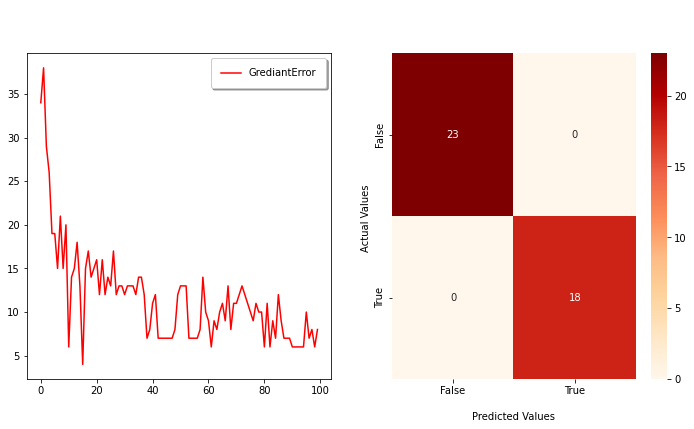

Confusion_matrix [array([[24,  0],
       [ 0, 17]]), array([[17,  0],
       [ 3, 21]]), array([[19,  5],
       [ 0, 17]]), array([[23,  0],
       [ 1, 17]]), array([[23,  0],
       [ 0, 18]])]
Scores: [100.0, 92.6829268292683, 87.8048780487805, 97.5609756097561, 100.0]
Mean Accuracy: 95.610%


In [178]:
scores,ErrorRate,Confusion_matrix = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
plots(ErrorRate,Confusion_matrix)


print('Confusion_matrix',Confusion_matrix)
## Display the visualization of the Confusion Matrix.
#plt.show()
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
